In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
bike=pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv')

In [3]:
bike.head()

,Date,Rented Bike Count,Hour,Temperature(蚓),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(蚓),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
bike.tail()

,Date,Rented Bike Count,Hour,Temperature(蚓),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(蚓),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(蚓)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(蚓)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

**We do not have any null values in any of the columns.:**

In [6]:
bike.describe()

,Rented Bike Count,Hour,Temperature(蚓),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(蚓),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


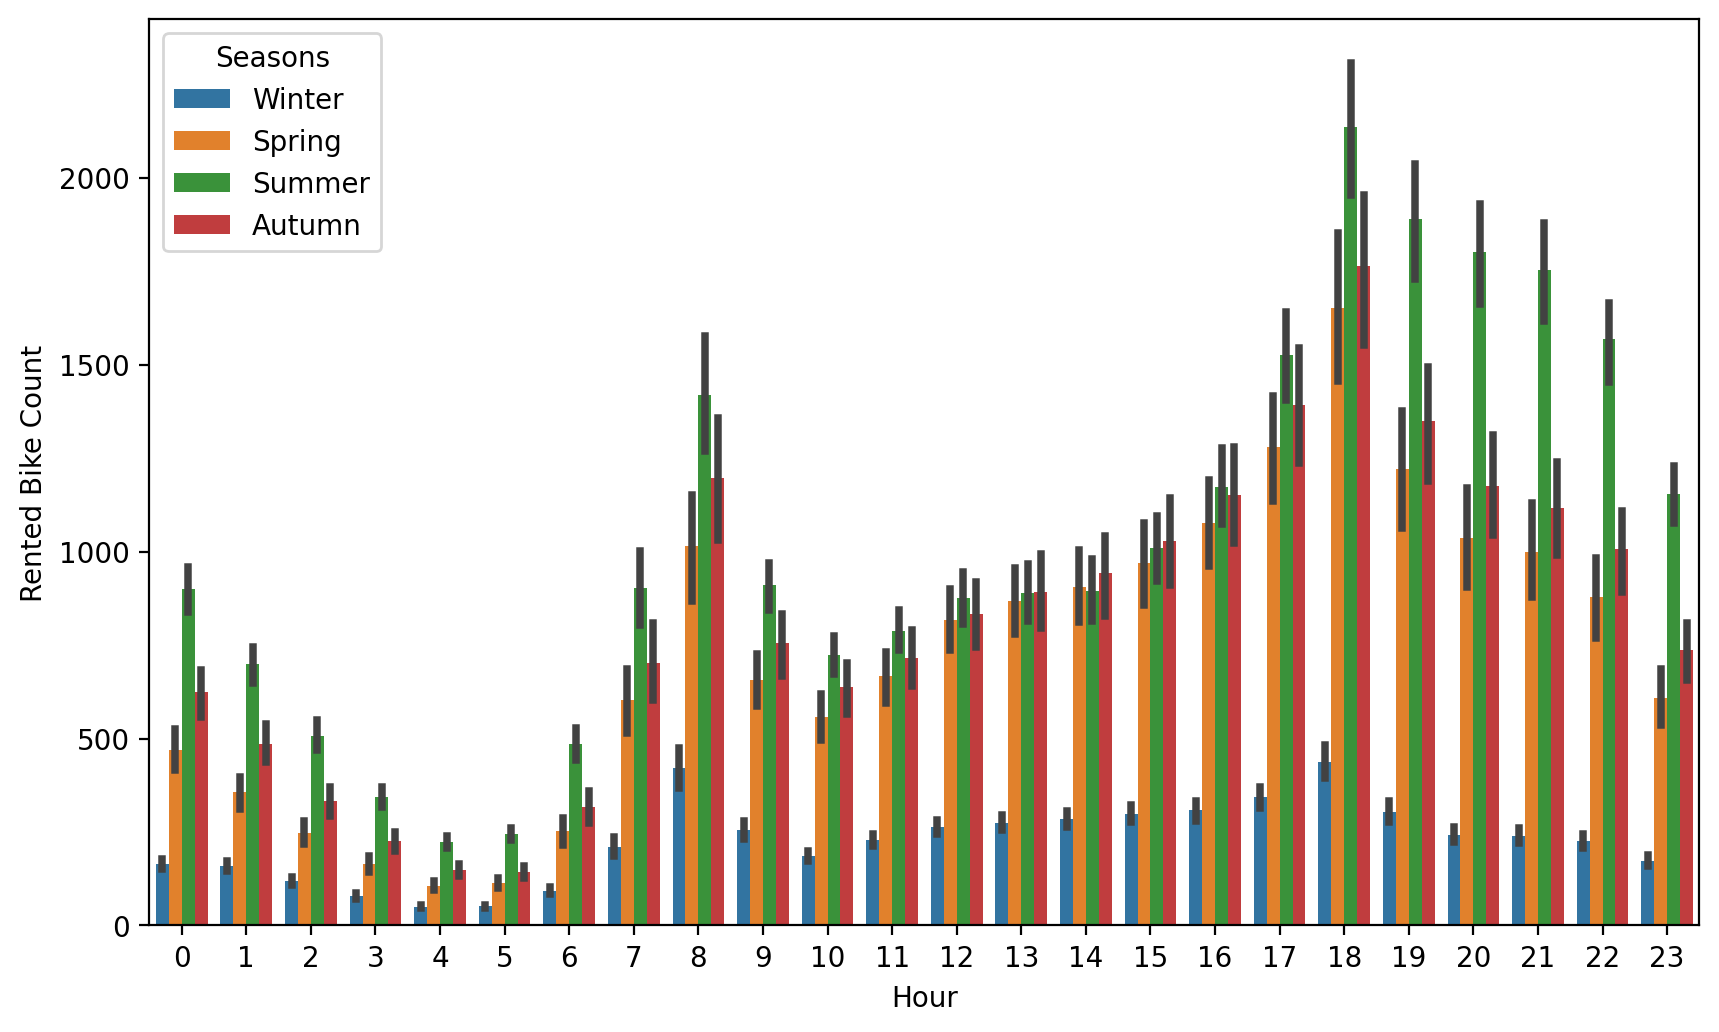

In [7]:
# checking bike counts with the time of day
figure = plt.figure(figsize=(10,6),dpi=200)
sns.barplot(x='Hour',y='Rented Bike Count',data=bike,hue='Seasons')

Bike Count is maximum around 6pm 

In [8]:
bike['Hour']=bike['Hour'].astype(object)

Hour Column is a categorial variable so we have changed its data type for feature engineering later.

In [9]:
# extracting day, month and year from date
bike['Date']=pd.to_datetime(bike['Date'])

In [10]:
bike['Month'] = bike['Date'].dt.month_name()


In [11]:
bike['Year'] = bike['Date'].dt.year.astype('object')


In [12]:
bike['Day'] = bike['Date'].dt.day_name()


In [13]:
# dropping the date column

bike.drop('Date',axis=1,inplace=True)

In [14]:
bike['Day']=np.where(bike['Day'].isin(['Saturday','Sunday']),'Weekend','Weekday')


In [15]:
bike

,Rented Bike Count,Hour,Temperature(蚓),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(蚓),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Year,Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,January,2017,Weekday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,January,2017,Weekday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,January,2017,Weekday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,January,2017,Weekday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,January,2017,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,November,2018,Weekday
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,November,2018,Weekday
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,November,2018,Weekday
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,November,2018,Weekday


In [16]:
bike['Day'].value_counts()

Weekday    6216
Weekend    2544
Name: Day, dtype: int64

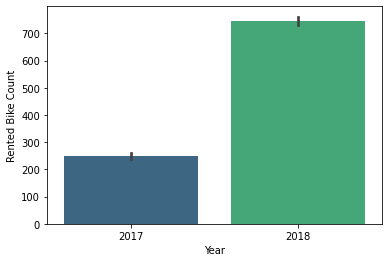

In [17]:
sns.barplot(x='Year',y='Rented Bike Count',data = bike,palette='viridis')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

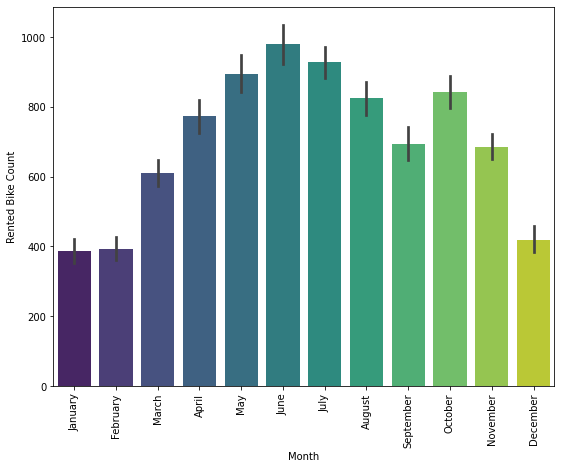

In [18]:
plt.figure(figsize=(8,6))
sns.barplot(x='Month',y='Rented Bike Count',data = bike,palette='viridis')
plt.tight_layout()
plt.xticks(rotation=90)

**Bike Counts peak around June and are maximum during the period between May and July, possibly during summer break.

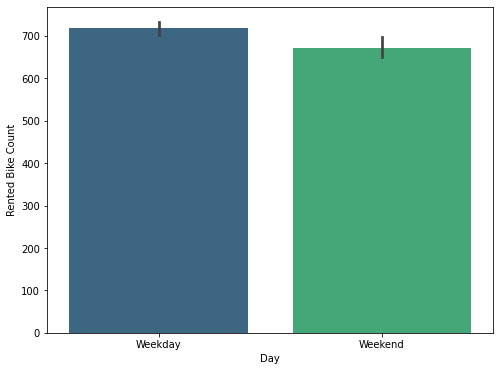

In [19]:
fig = plt.figure(figsize=(8,6))

sns.barplot(x='Day',y='Rented Bike Count',data = bike,palette='viridis')



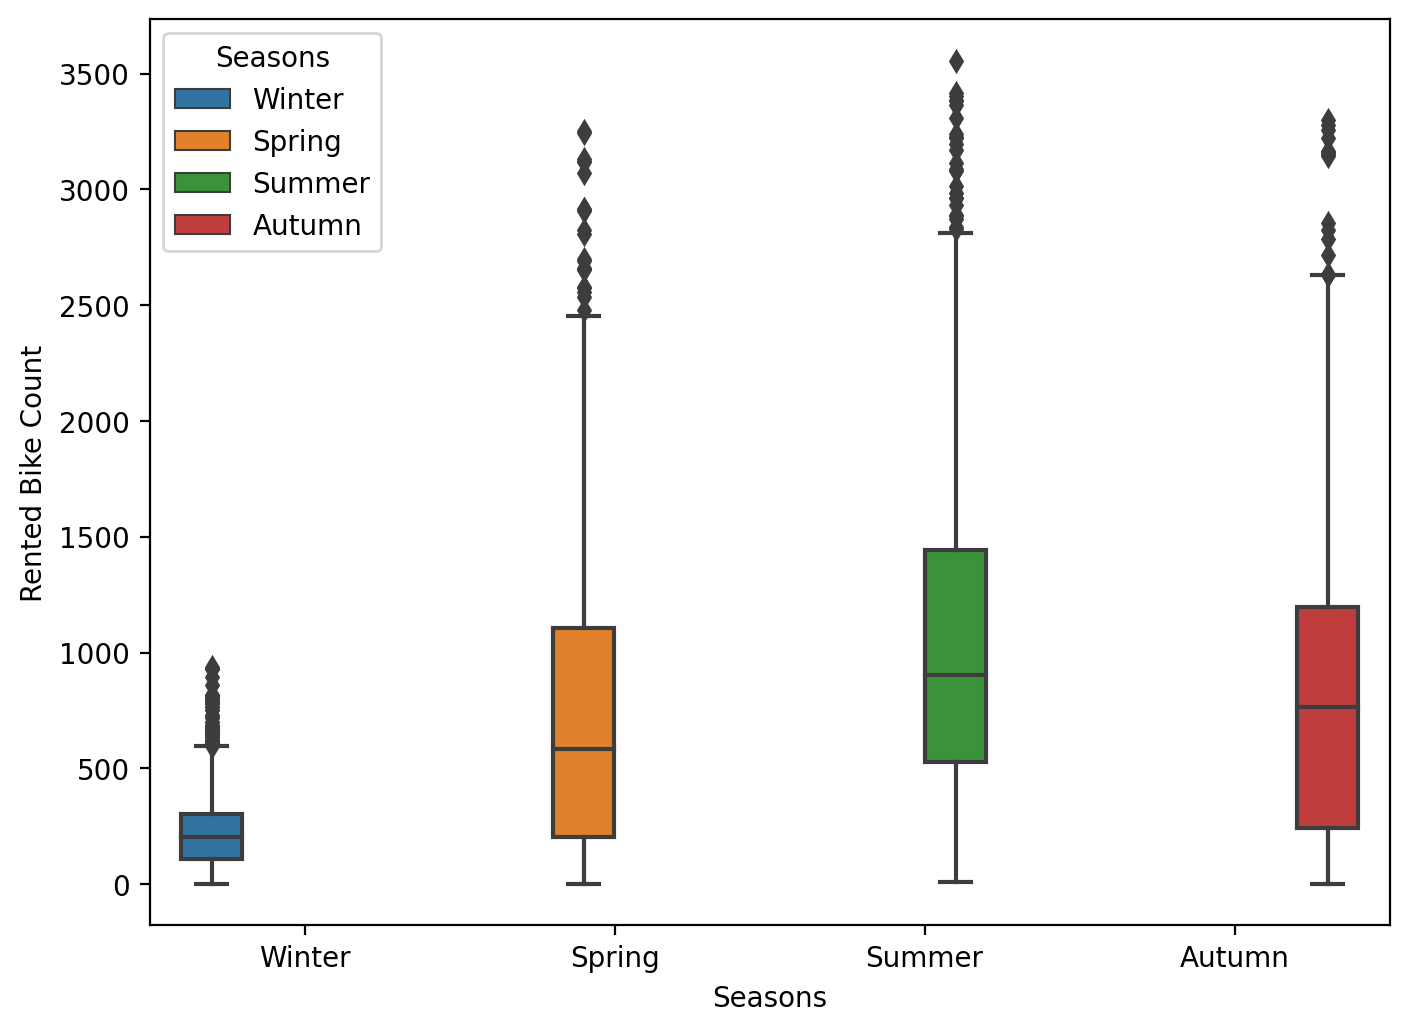

In [20]:
# lets check for outliers
fig = plt.figure(figsize=(8,6),dpi = 200)
sns.boxplot(x='Seasons',y='Rented Bike Count',hue = 'Seasons',data=bike)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 34451 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 34451 missing from current font.
  font.set_text(s, 0, flags=flags)


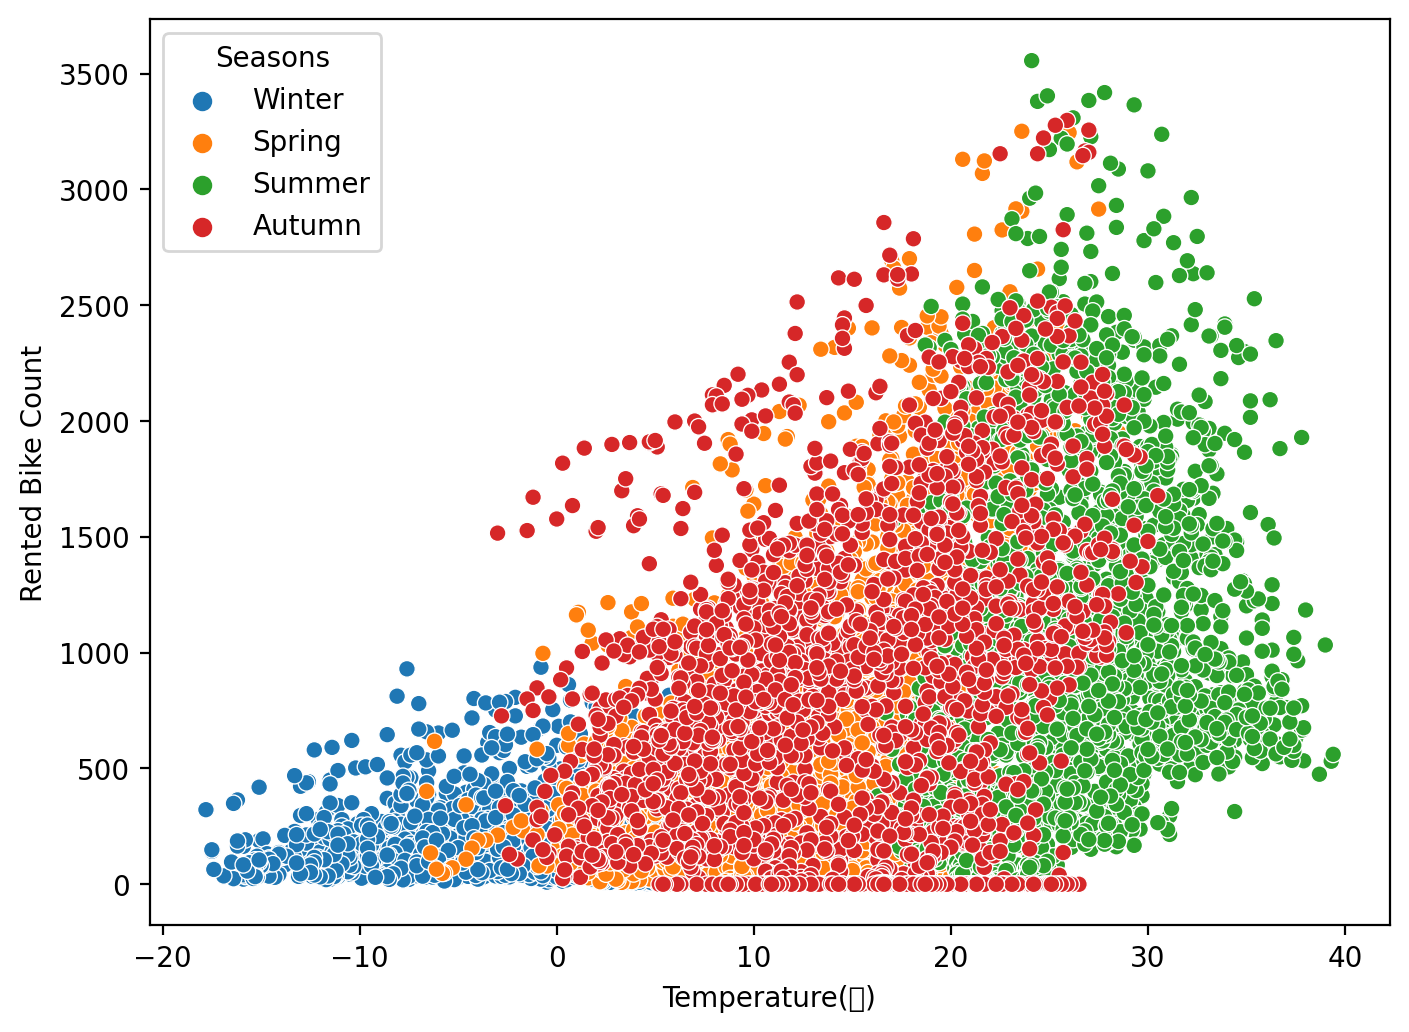

In [21]:
plt.figure(figsize=(8,6),dpi=200)


sns.scatterplot(x='Temperature(蚓)',y='Rented Bike Count',data=bike, hue ='Seasons')

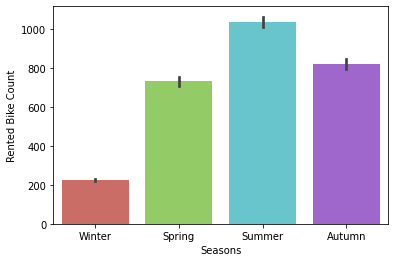

In [22]:
sns.barplot(x='Seasons',y='Rented Bike Count',data=bike,palette='hls')

**We had earlier seen that bike counts are maximum during summer, this plot proves that hypothesis.**

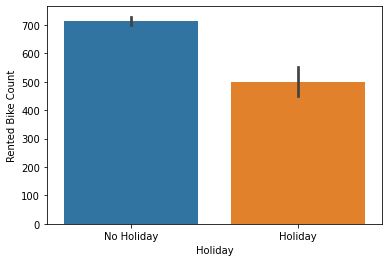

In [23]:
sns.barplot(x='Holiday',y='Rented Bike Count',data=bike)

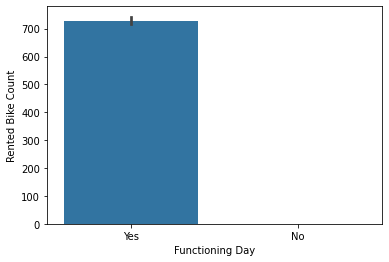

In [24]:
sns.barplot(x='Functioning Day',y='Rented Bike Count',data=bike)

In [25]:
#lets get all categorical and numerical columns together

categorical_col = bike.select_dtypes(['object'])
categorical_col

,Hour,Seasons,Holiday,Functioning Day,Month,Year,Day
0,0,Winter,No Holiday,Yes,January,2017,Weekday
1,1,Winter,No Holiday,Yes,January,2017,Weekday
2,2,Winter,No Holiday,Yes,January,2017,Weekday
3,3,Winter,No Holiday,Yes,January,2017,Weekday
4,4,Winter,No Holiday,Yes,January,2017,Weekday
...,...,...,...,...,...,...,...
8755,19,Autumn,No Holiday,Yes,November,2018,Weekday
8756,20,Autumn,No Holiday,Yes,November,2018,Weekday
8757,21,Autumn,No Holiday,Yes,November,2018,Weekday
8758,22,Autumn,No Holiday,Yes,November,2018,Weekday


In [26]:
numerical_category=bike.select_dtypes(['int64','float'])
numerical_category

,Rented Bike Count,Temperature(蚓),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(蚓),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


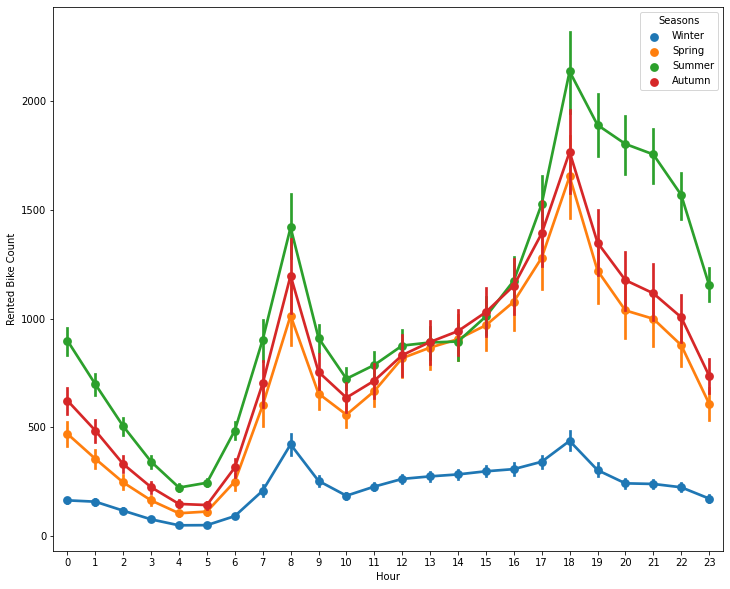

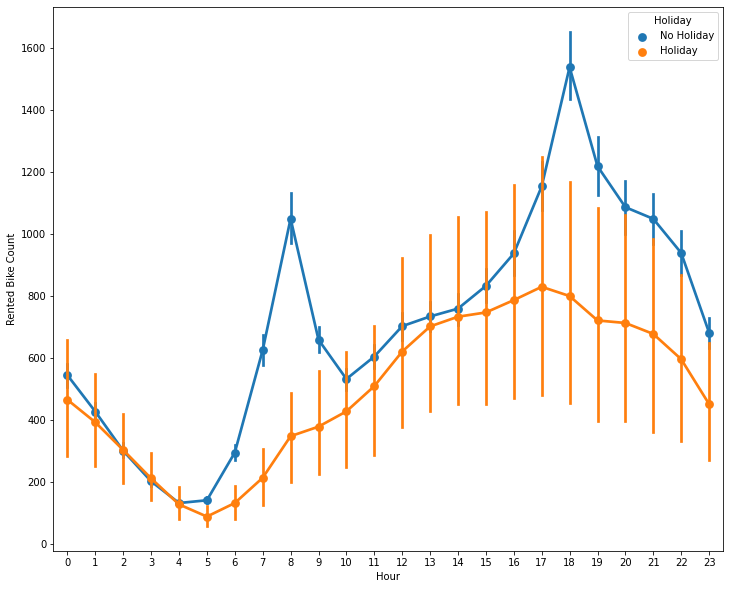

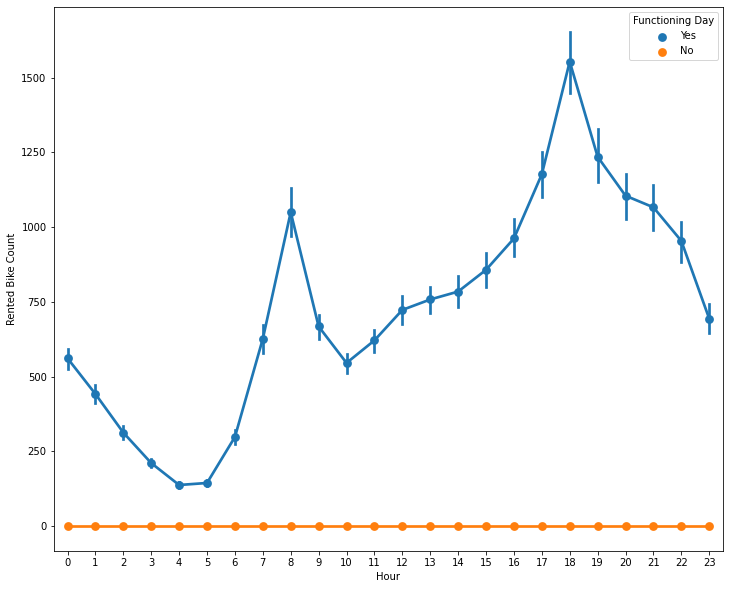

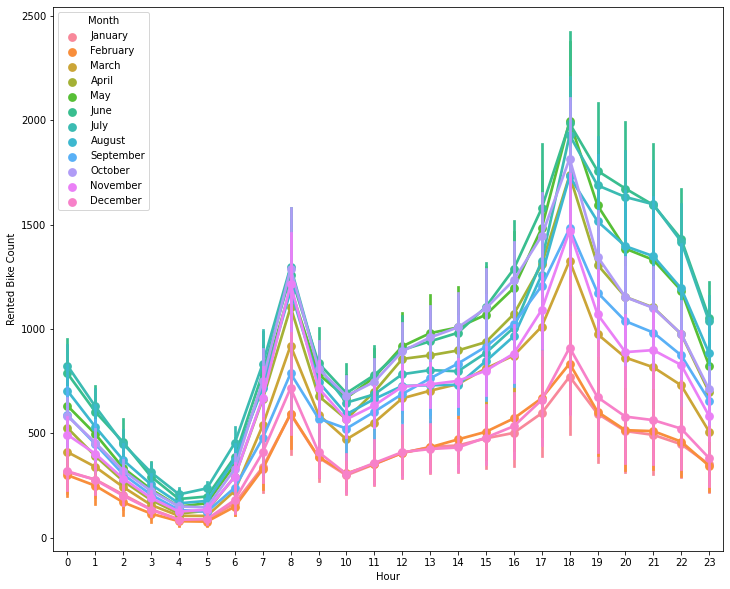

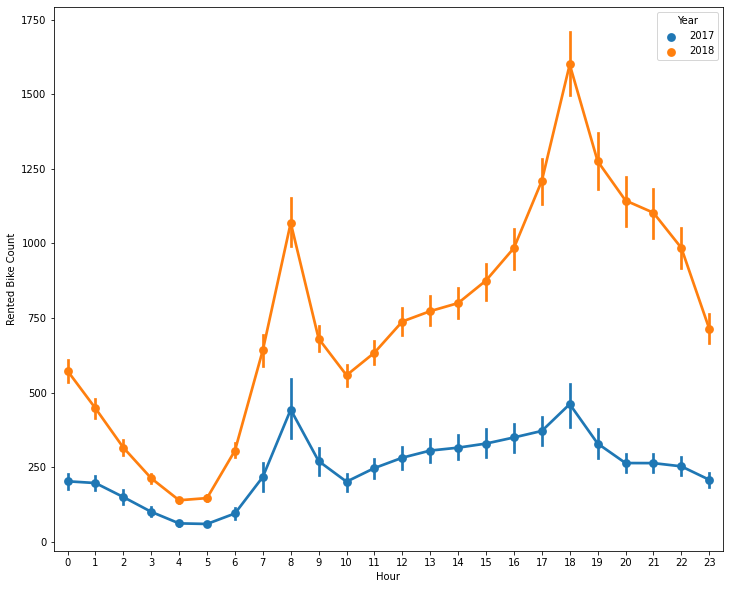

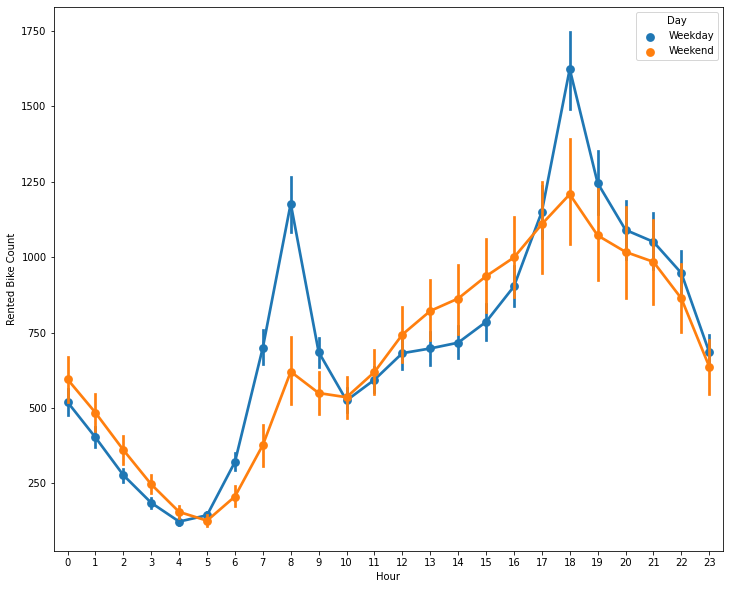

In [27]:
for i in categorical_col:
  if i=='Hour':
    pass
  else:
    plt.figure(figsize=(12,10))
    sns.pointplot(data=bike,x='Hour',hue=bike[i],y='Rented Bike Count')


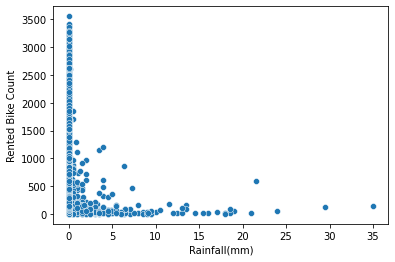

In [28]:
# lets explore some other relationships

sns.scatterplot(x='Rainfall(mm)',y='Rented Bike Count',data=bike)

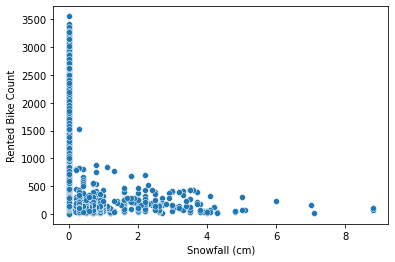

In [29]:
sns.scatterplot(x='Snowfall (cm)',y='Rented Bike Count',data=bike)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

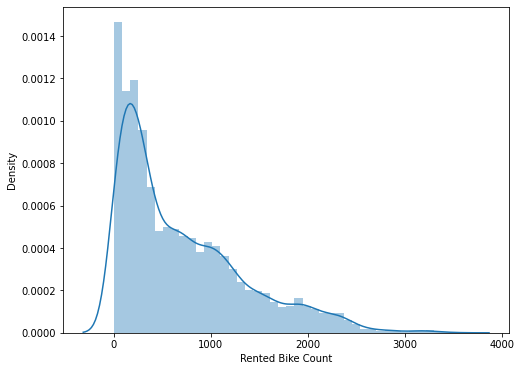

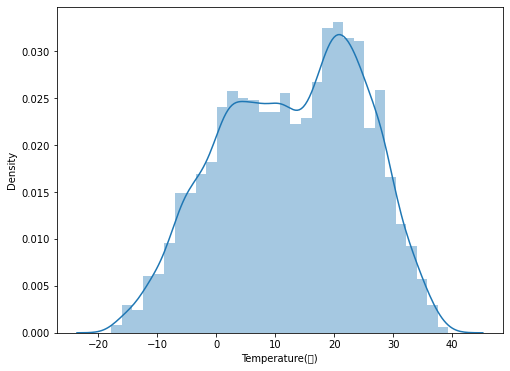

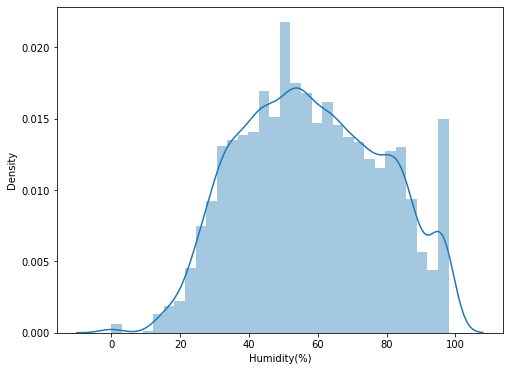

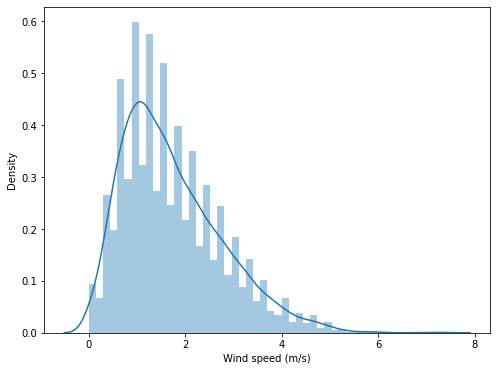

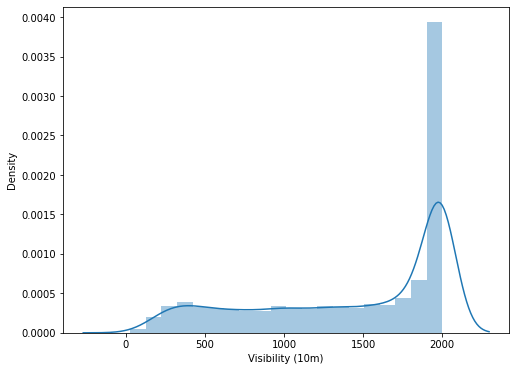

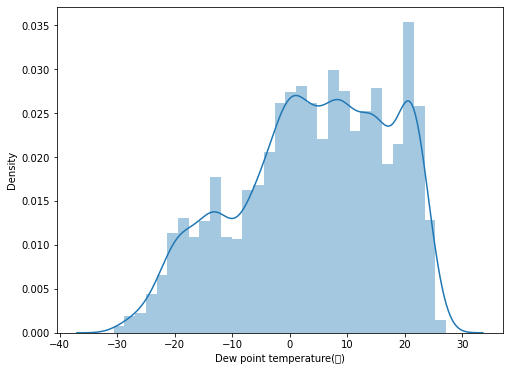

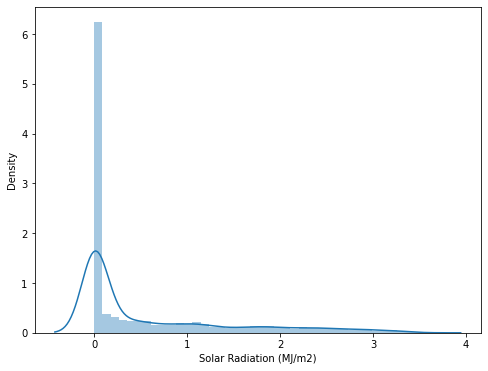

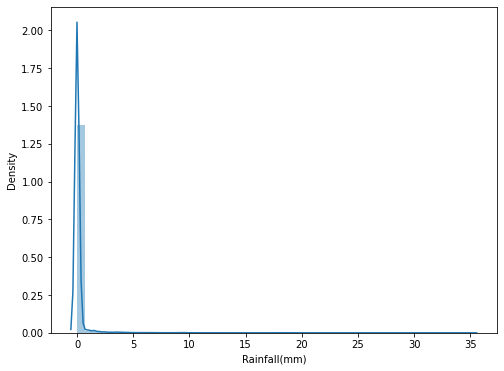

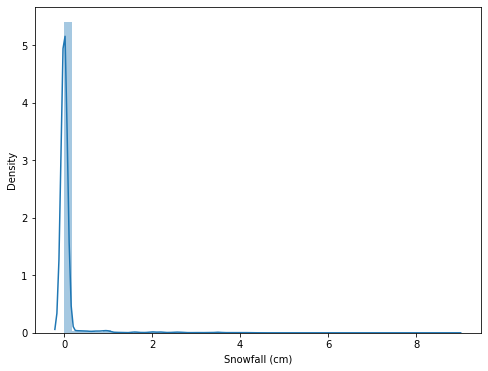

In [30]:
for i in numerical_category:

  plt.figure(figsize=(8,6))
  sns.distplot(bike[i],hist=True)


# **The plot shows that our target variable Rented Bike Count is skewed and we will need to transform it before building our model.**

**Feature Engineering using One Hot Encoding**

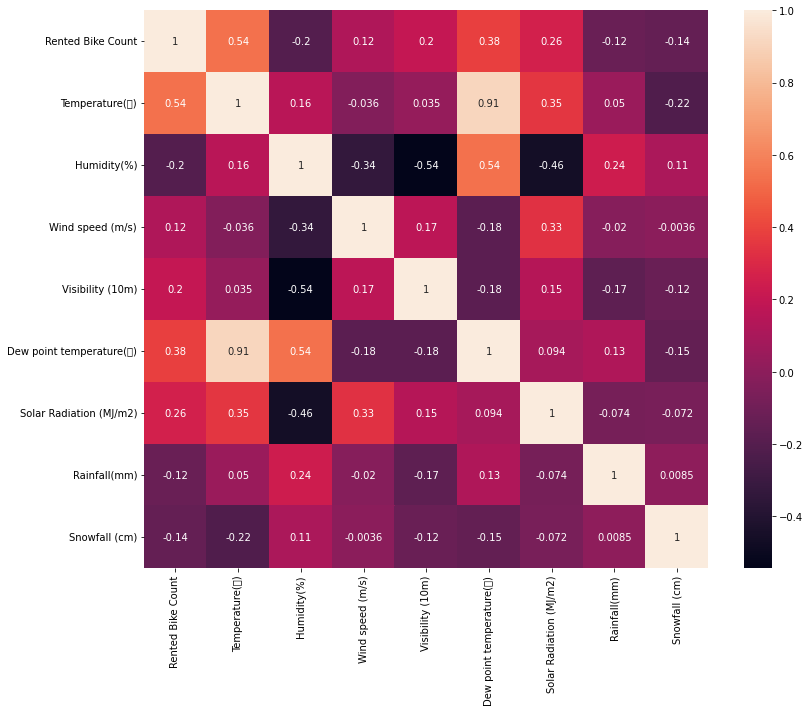

In [31]:
# lets check for correlations 
plt.figure(figsize=(12,10))
sns.heatmap(numerical_category.corr(),annot = True)
plt.tight_layout()

In [32]:
bike.corr()[:1].transpose()

,Rented Bike Count
Rented Bike Count,1.000000
Temperature(蚓),0.538558
Humidity(%),-0.199780
Wind speed (m/s),0.121108
Visibility (10m),0.199280
Dew point temperature(蚓),0.379788
Solar Radiation (MJ/m2),0.261837
Rainfall(mm),-0.123074
Snowfall (cm),-0.141804


# **Temperature and Dew Point Temperature column are highly correlated **


In [33]:
bike.drop('Dew point temperature(蚓)',axis=1,inplace=True)

In [34]:
bike=pd.get_dummies(data=bike,drop_first=True,sparse=False)

In [35]:
bike.columns

Index(['Rented Bike Count', 'Temperature(蚓)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4',
       'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11',
       'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17',
       'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Functioning Day_Yes', 'Month_August',
       'Month_December', 'Month_February', 'Month_January', 'Month_July',
       'Month_June', 'Month_March', 'Month_May', 'Month_November',
       'Month_October', 'Month_September', 'Year_2018', 'Day_Weekend'],
      dtype='object')

In [36]:
import sklearn

In [37]:
from sklearn.preprocessing import MinMaxScaler


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
bike.columns

Index(['Rented Bike Count', 'Temperature(蚓)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4',
       'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11',
       'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17',
       'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Functioning Day_Yes', 'Month_August',
       'Month_December', 'Month_February', 'Month_January', 'Month_July',
       'Month_June', 'Month_March', 'Month_May', 'Month_November',
       'Month_October', 'Month_September', 'Year_2018', 'Day_Weekend'],
      dtype='object')

In [40]:
X = bike[['Temperature(蚓)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4',
       'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11',
       'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17',
       'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Functioning Day_Yes', 'Month_August',
       'Month_December', 'Month_February', 'Month_January', 'Month_July',
       'Month_June', 'Month_March', 'Month_May', 'Month_November',
       'Month_October', 'Month_September', 'Year_2018', 'Day_Weekend']]

In [41]:
bike['Rented Bike Count'].skew()

1.1534281773679014

In [42]:
tranformed_Y = np.log(bike['Rented Bike Count'])

tranformed_Y.skew()

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


nan

# *Log Tranform will not give desirable results as we have some values with 0 in the Bike Count column.*

In [43]:
tranformed_sqrt_Y = np.sqrt(bike['Rented Bike Count'])

tranformed_sqrt_Y.skew()

0.237362090985412

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


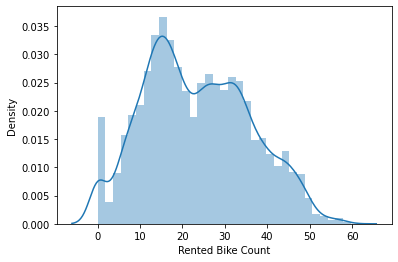

In [44]:
sns.distplot(np.sqrt(bike['Rented Bike Count']))

# *We can see that square root tranformation worked and skewness is diminished by some extent.*

In [45]:
y = tranformed_sqrt_Y

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
norm = MinMaxScaler().fit(X_train)

## *We have used Normalization on our feature variables as they were skewed as well.*

In [48]:
X_train_norm = norm.transform(X_train)


In [49]:
X_test_norm = norm.transform(X_test)


In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
regressor = LinearRegression()

In [52]:
regressor.fit(X_train_norm,y_train)

LinearRegression()

In [53]:
regressor.coef_

array([ 25.31270061, -13.51034339,  -1.01053185,   0.80655799,
         3.95340621, -45.91709126,  -1.16987435,  -1.9301591 ,
        -5.02915633,  -7.32072305,  -9.61548454,  -9.37206835,
        -4.77791127,   1.72289434,   6.97569221,   0.96582639,
        -3.56526143,  -3.61398078,  -3.22811705,  -3.14293882,
        -3.39513568,  -2.03810421,   0.13937216,   4.12840663,
        10.09479547,   7.24913634,   6.39238467,   6.53979673,
         5.24975576,   1.65932761,  -3.16673164,  -3.23256683,
        -8.16178487,   3.04761014,  28.88036112,  -0.79858329,
         0.22766259,  -0.43042785,   0.42789718,  -0.34392093,
         4.05799038,   0.07962236,   1.27195438,   0.57145489,
         1.74461141,   0.08450984,  -2.35114054,  -0.62388112])

In [54]:
y_pred_train=regressor.predict(X_train_norm)

In [55]:
y_pred=regressor.predict(X_test_norm)

In [56]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score




In [57]:
mean_squared_error(y_test,y_pred)

38.63515797844366

In [58]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

6.215718621241124

In [59]:
mean_absolute_error(y_test,y_pred)

4.640151737143537

In [60]:
r2_score(y_test,y_pred)

0.7456919874736279

In [61]:
r2_score(y_train,y_pred_train)

0.7651125105397154

# We have also used standardization to see the results compared to Normalization

In [62]:
from sklearn.preprocessing import StandardScaler


In [63]:
standard_scale = StandardScaler().fit(X_train)

In [64]:
X_train_stand = standard_scale.transform(X_train)


In [65]:
X_test_stand = standard_scale.transform(X_test)

In [66]:
stand_regressor = LinearRegression()

In [67]:
stand_regressor.fit(X_train_stand,y_train)

LinearRegression()

In [68]:
y_pred_stand=stand_regressor.predict(X_test_stand)

In [69]:
mean_squared_error(y_test,y_pred_stand)

38.635157978443644

In [70]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred_stand))
RMSE

6.215718621241122

In [71]:
mean_absolute_error(y_test,y_pred_stand)

4.640151737143537

In [72]:
r2_score(y_test,y_pred_stand)

0.7456919874736279

# *Using Ridge Regression with Cross Validation*

In [87]:
from sklearn.linear_model import Ridge

In [88]:
model = Ridge(alpha=10)

In [89]:
from sklearn.model_selection import cross_val_score

In [90]:
scores = cross_val_score(model,X_train_norm,y_train,
                         scoring='r2',cv=5)

In [91]:
scores

array([0.75090846, 0.75070585, 0.76527499, 0.73738918, 0.75311802])

In [92]:
abs(scores.mean())

0.7514793000076838

In [93]:
model = Ridge(alpha=1)

In [94]:
scores = cross_val_score(model,X_train_norm,y_train,
                         scoring='r2',cv=5)

In [95]:
scores

array([0.76222185, 0.76238344, 0.77191639, 0.74242683, 0.76087507])

In [96]:
abs(scores.mean())

0.7599647148496164

In [97]:
model.fit(X_train_norm,y_train)

Ridge(alpha=1)

In [98]:
y_final_test_pred = model.predict(X_test_norm)

In [102]:
r2_score(y_test,y_final_test_pred)

0.748433998391349

In [100]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.3, random_state = 42)

In [ ]:
decision_tree_regressor = DecisionTreeRegressor(random_state=0)

In [ ]:
decision_tree_regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
y_pred1 = decision_tree_regressor.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_pred1)

29.387381200445546

In [ ]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred1))
RMSE


5.421012931219178

In [ ]:
mean_absolute_error(y_test,y_pred1)

3.437217994013453

In [ ]:
r2_score(y_test,y_pred1)

0.8065635835989085